In this notebook, we preprocess the Pima Indian dataset and perform classification of diabetes outcome using a basic or Single Layer Perceptron model.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis 

In [2]:
#read csv as pandas dataframe and examine first 5 rows
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#examine dataframe 
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#replace '0' class with '-1'
diabetes['Outcome'] = diabetes['Outcome'].replace(0,-1)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


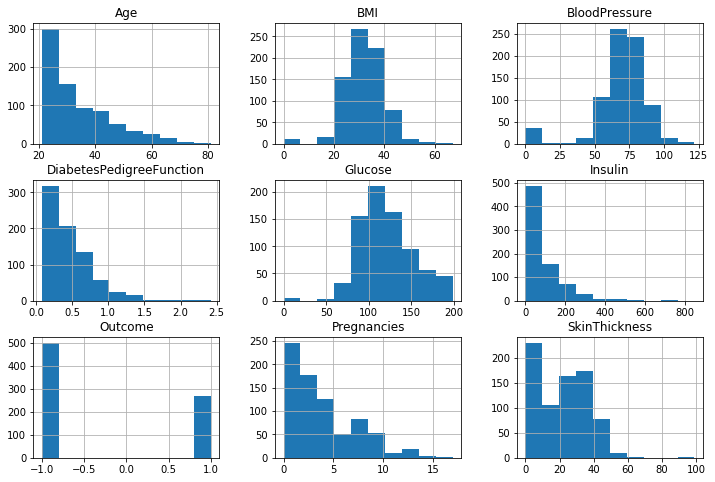

In [5]:
#visualize histograms for each feature
fig,ax = plt.subplots(1,1, figsize=(12,8))
ax = fig.gca()
diabetes.hist(ax=ax);

In [6]:
#examine descriptive statistics
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,-0.302083
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.953903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,-1.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,-1.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,-1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Removing Outliers
As seen from descriptive statistics and histograms for each feature, there are several outliers. Some of these outliers may represent real data; however we can eliminate the obvious discrepancies. For example, we can remove all rows where 'Glucose', 'Blood Pressure','Insulin' and 'BMI' are 0 as these values are not possible for living subjects.

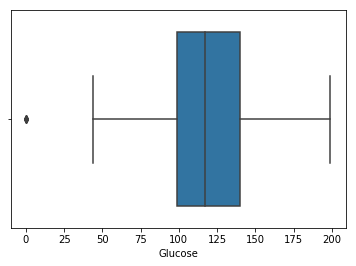

In [7]:
sns.boxplot(x=diabetes['Glucose']);

In [8]:
diabetes = diabetes[diabetes['Glucose']>25]
len(diabetes)

763

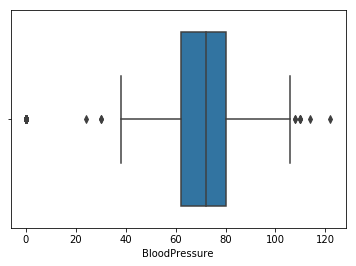

In [9]:
sns.boxplot(x=diabetes['BloodPressure']);

In [10]:
diabetes = diabetes[diabetes['BloodPressure']>0]
len(diabetes)

728

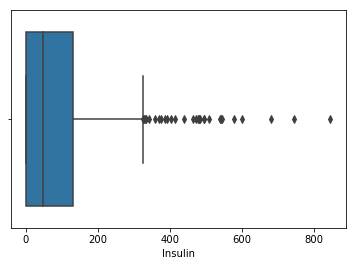

In [11]:
sns.boxplot(x=diabetes['Insulin']);

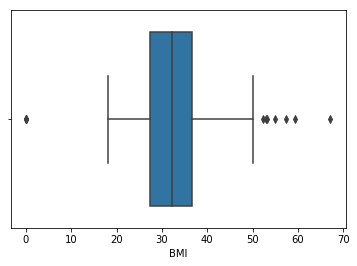

In [12]:
sns.boxplot(x=diabetes['BMI']);

In [13]:
diabetes = diabetes[diabetes['BMI']>0]
len(diabetes)

724

After removing all outliers, we are left with 724 rows.

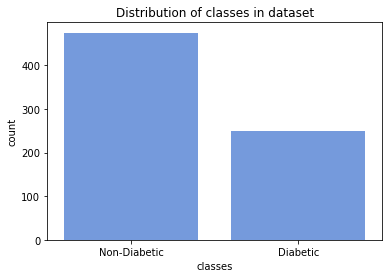

In [14]:
#examine class distribution
fig,ax = plt.subplots(1,1,figsize=(6,4))
sns.countplot(diabetes['Outcome'],color='cornflowerblue', ax=ax)
ax.set_xlabel('classes')
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])
ax.set_title('Distribution of classes in dataset');


The two classes are imbalanced with a ratio of approximately 2:1 for Non-Diabetic: Diabetic subjects.

In [29]:
diabetes['Outcome'].value_counts()

0.6560773480662984

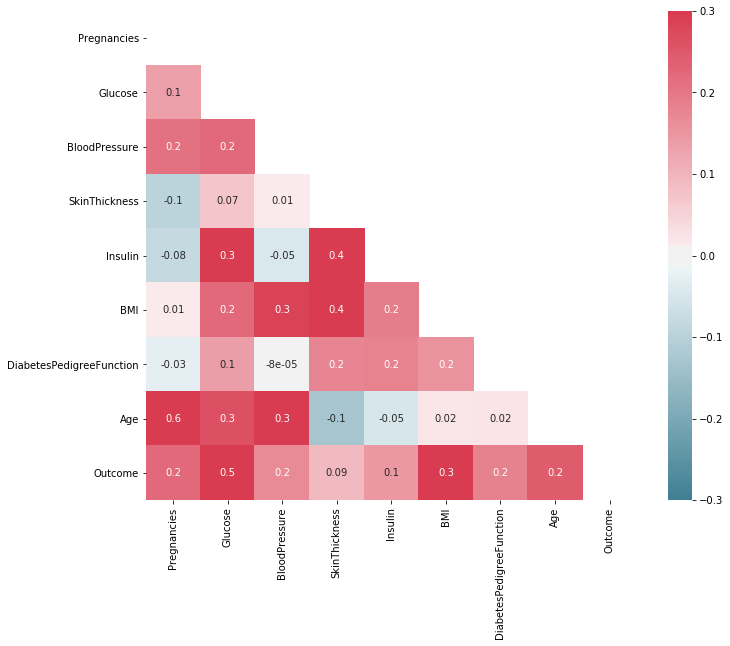

In [15]:
#view heatmap to see correlation of various features with outcome
plt.figure(figsize=(11,9))
corr = diabetes.corr()
#create mask to hide repetitive other half of heatmap to make it visually appealing
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#create color map
cmap = sns.diverging_palette(220,8,as_cmap=True)

#plot heatmap
sns.heatmap(corr,cmap=cmap,mask=mask, annot=True, fmt='.1g',vmin=-0.3,vmax=0.3);

All features are positively correlated with the outcome. 'Glucose' shows highest correlation with outcome; while 'Skin Thickness' is the lowest correlator. 

In [41]:
diabetes.corr()['Outcome']

Pregnancies                 0.224417
Glucose                     0.488384
BloodPressure               0.166703
SkinThickness               0.092030
Insulin                     0.145488
BMI                         0.299375
DiabetesPedigreeFunction    0.184947
Age                         0.245741
Outcome                     1.000000
Name: Outcome, dtype: float64

## Machine Learning 

In [16]:
#split data into train and test sets
from sklearn.model_selection import train_test_split
col_names= diabetes.columns.to_list()
X = diabetes[col_names[:-1]]
y = diabetes['Outcome']
X_train_orig,X_test_orig,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [17]:
#standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train_orig)
X_train = scaler.transform(X_train_orig)
X_test = scaler.transform(X_test_orig)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Basic perceptron

In [18]:
from sklearn.utils import shuffle
class Perceptron(object):
    """Create Single Layer Perceptron class estimator """
    
    def __init__(self, no_of_features, epochs=50, learning_rate=1,random_state=42):
        self.random_state = random_state
        np.random.seed(random_state)
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.random.rand(no_of_features)
        self.bias = 0
           
  
    def activation(self, x):
        """Perform a dot/inner product of weight vector and Input features, add with bias term to compute z.
        Calculate output as 1 if z>=0, else -1 
        """
        z = self.bias + np.dot(np.transpose(self.weights),x)
        if z >= 0:
            output = 1
        else:
            output = -1            
        return output

    def fit(self, X, y):
        """Calculate error and update weights and bias to fit model"""
        for i in range(self.epochs):
            X,y = shuffle(X,y)
            for s in range(len(X)):
                output = self.activation(X[s])
                self.weights += self.learning_rate * (y[s] - output)  * X[s]
                self.bias += self.learning_rate * (y[s] - output)
            
                
    def predict(self,X):
        """Predict outputs using trained model, return predictions as numpy array."""
        predictions = []
        for i in range(len(X)):
            prediction = self.bias + np.dot(np.transpose(self.weights),X[i])
            if prediction >= 0:
                prediction=1
            else:
                prediction=-1
            predictions.append(prediction)
        return np.asarray(predictions)    
            
            
            

In [19]:
train_set = np.concatenate((X_train,y_train.reshape([y_train.shape[0],1])), axis=1)
train_set.shape

(506, 9)

In [20]:
import random
def k_split(dataset, k_folds, random_state):
    """This function splits a dataset array into specified number of k_folds.
    Returns: a list of k_folds numbers of sublists"""
    random.seed(random_state)
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / k_folds)
    for i in range(k_folds):
        fold = list()
        while len(fold) < fold_size:
            index = random.randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [21]:
from sklearn.metrics import accuracy_score
def kfold_cross_validation(dataset,k_folds,random_state,classifier):
    """This function performs k-fold cross validation of dataset with specified classifier 
    using accuracy as scoring metric.
    Returns: a list of scores obtained, corresponding each k_fold """
    k_folds = k_split(dataset,k_folds,random_state)
    scores = []
    for i in range(len(k_folds)):
        folds_copy = list(k_folds)
        val_ = np.asarray(folds_copy.pop(i))
        train_ = np.vstack(folds_copy)
        classifier.fit(train_[:,:-1],train_[:,-1])
        y_pred = classifier.predict(val_[:,:-1])
        y_true = val_[:,-1]
        score = accuracy_score(y_true,y_pred)
        scores.append(score)
    
    return scores

In [84]:
k_folds = k_split(train_set,5,42)
len(k_folds)

5

In [85]:
def count_classes(fold):
    diabetic = 0
    non_diabetic = 0
    for i in range(len(fold)):
        if fold[i][-1] == 1.0:
            diabetic += 1
        else:
            non_diabetic += 1
    return diabetic,non_diabetic        

In [86]:
classes_count = []
for fold in range(len(k_folds)):
    count = count_classes(k_folds[fold])
    classes_count.append(count)
classes_count
diabetic = [x[0] for x in classes_count]
non_diabetic = [x[1] for x in classes_count]


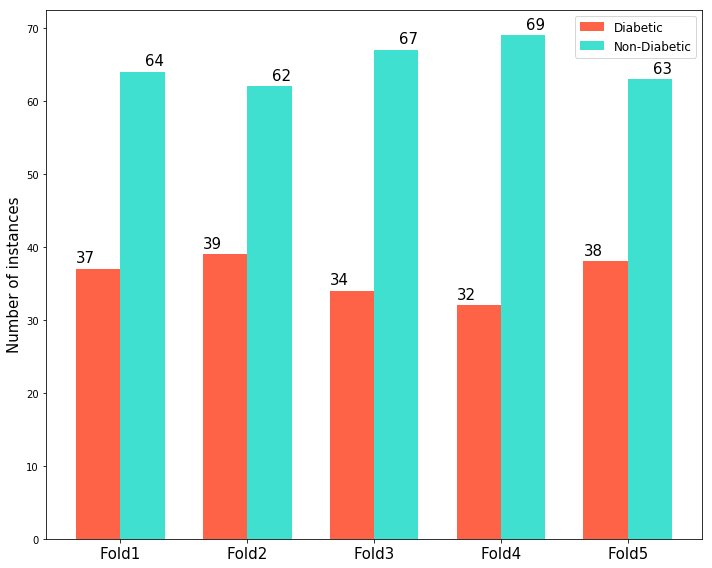

In [108]:
ind = np.arange(len(diabetic))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(ind - width/2, diabetic, width,
                label='Diabetic', color = 'tomato')
rects2 = ax.bar(ind + width/2, non_diabetic, width,
                label='Non-Diabetic', color='turquoise')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of instances', fontsize = 15)
#ax.set_title('Class distribution in folds', fontsize=25)
ax.set_xticks(ind)
ax.set_xticklabels(('Fold1', 'Fold2','Fold3','Fold4','Fold5'), fontsize = 15)
ax.legend(fontsize = 12)


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', fontsize=15)


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()

In [61]:
diabetic = 0
non_diabetic = 0
for i in range(len(k_folds[0])):
    if k_folds[0][i][-1] == 1.0:
        diabetic += 1
    else:
        non_diabetic += 1
        


101

In [22]:
perceptron = Perceptron(no_of_features=8,epochs=100,learning_rate=0.1, random_state=0)
cross_val_scores = kfold_cross_validation(dataset=train_set,k_folds=5,random_state=0,classifier=perceptron)
cross_val_scores

[0.6633663366336634,
 0.7524752475247525,
 0.6732673267326733,
 0.6633663366336634,
 0.7326732673267327]

In [23]:
mean_score = np.mean(cross_val_scores)
std_dev = np.std(cross_val_scores)
print('Basic Perceptron - mean accuracy obtained with 5 fold cross validation on train set: {:.2f}'.format(mean_score) + 
      ' with standard deviation: {:.2f}.'.format(std_dev))

Basic Perceptron - mean accuracy obtained with 5 fold cross validation on train set: 0.70 with standard deviation: 0.04.
